In [1]:
pwd

'C:\\Users\\Mitali\\Documents\\MS\\Programming Data Mining Applications\\Final Project\\Mitali - MovieLens - Clustering'

In [532]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [594]:
all_data_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
all_data = pd.read_csv(r"u.data",sep='\t', encoding='latin-1', names = all_data_cols)
all_data.drop('timestamp', 1, inplace = True) #drop 'timestamp'
all_data.head(10)

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
5,298,474,4
6,115,265,2
7,253,465,5
8,305,451,3
9,6,86,3


In [595]:
all_data.shape

(100000, 3)

In [596]:
#sort all_data
all_data.head(10)

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
5,298,474,4
6,115,265,2
7,253,465,5
8,305,451,3
9,6,86,3


In [644]:
item_data_cols = ['movie_id', 'title', 'release_date', 'video_release_date',"IMDb_URL","unknown","Action","Adventure","Animation", 
              "Childrens","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery",
               "Romance","Sci-Fi","Thriller","War","Western"]
item_data = pd.read_csv(r"u.item",sep='|', encoding='latin-1', names = item_data_cols)
item_data.shape

(1682, 24)

In [645]:
item_data.head(10)

,movie_id,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [667]:
movie_info = item_data[['movie_id', 'title']]
movie_info.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [760]:
item_data.drop(item_data.columns[[2,3,4]], 1, inplace = True) #drop unrequired oclumns
item_data.head(10)

,movie_id,title,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [761]:
genre_types = item_data.columns[1:]
genre_types

Index(['title', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [762]:
item_data.shape

(1682, 21)

In [763]:
user_data_cols = ['user_id', 'age', 'gender', 'occupation', 'zipcode']
user_data = pd.read_csv(r"u.user",sep='|', encoding='latin-1', names = user_data_cols)
user_data.drop('zipcode', 1, inplace = True) #drop 'timestamp'
user_data.head(10)

,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other
5,6,42,M,executive
6,7,57,M,administrator
7,8,36,M,administrator
8,9,29,M,student
9,10,53,M,lawyer


In [764]:
user_data.shape

(943, 4)

In [765]:
all_data['rating'].head(10)

0    3
1    3
2    1
3    2
4    1
5    4
6    2
7    5
8    3
9    3
Name: rating, dtype: int64

In [766]:
#left join of all_data and user_data
merge_1 = pd.merge(user_data, all_data)
merge_1.shape

(100000, 6)

In [767]:
merge_1.head()

,user_id,age,gender,occupation,movie_id,rating
0,1,24,M,technician,61,4
1,1,24,M,technician,189,3
2,1,24,M,technician,33,4
3,1,24,M,technician,160,4
4,1,24,M,technician,20,4


In [771]:
merged_data = pd.merge(merge_1, item_data)
merged_data.shape
print(merged_data.head())

   user_id  age gender  occupation  movie_id  rating  \
0        1   24      M  technician        61       4   
1       13   47      M    educator        61       4   
2       18   35      F       other        61       4   
3       58   27      M  programmer        61       5   
4       59   49      M    educator        61       4   

                        title  unknown  Action  Adventure   ...     Fantasy  \
0  Three Colors: White (1994)        0       0          0   ...           0   
1  Three Colors: White (1994)        0       0          0   ...           0   
2  Three Colors: White (1994)        0       0          0   ...           0   
3  Three Colors: White (1994)        0       0          0   ...           0   
4  Three Colors: White (1994)        0       0          0   ...           0   

   Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  \
0          0       0        0        0        0       0         0    0   
1          0       0        0        0  

In [769]:
final_data = merged_data
final_data.shape

(100000, 26)

In [772]:
final_data.drop('title',1,inplace = True)
final_data.head(10)

,user_id,age,gender,occupation,movie_id,rating,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,47,M,educator,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18,35,F,other,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,58,27,M,programmer,61,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,59,49,M,educator,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,60,50,M,healthcare,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,76,20,M,student,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,94,26,M,student,61,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,144,53,M,programmer,61,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,154,25,M,student,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [550]:
final_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100000,NaN,NaN,NaN,462.485,266.614,1,254,447,682,943
age,100000,NaN,NaN,NaN,32.9699,11.5626,7,24,30,40,73
gender,100000,2,M,74260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,100000,21,student,21957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
movie_id,100000,NaN,NaN,NaN,425.53,330.798,1,175,322,631,1682
rating,100000,NaN,NaN,NaN,3.52986,1.12567,1,3,4,4,5
unknown,100000,NaN,NaN,NaN,0.0001,0.00999955,0,0,0,0,1
Action,100000,NaN,NaN,NaN,0.25589,0.436362,0,0,0,1,1
Adventure,100000,NaN,NaN,NaN,0.13753,0.344408,0,0,0,0,1
Animation,100000,NaN,NaN,NaN,0.03605,0.186416,0,0,0,0,1


In [551]:
final_data.drop('user_id',1,inplace=True)
final_data.drop('movie_id',1,inplace=True)

In [552]:
#create age bins
bins = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
final_data['age_bins'] = pd.cut(final_data.age, range(0, 81, 10), right=False, labels=bins)
final_data['age_bins'].value_counts()

20-29    39535
30-39    25696
40-49    15021
50-59     8704
10-19     8181
60-69     2623
70-79      197
0-9         43
Name: age_bins, dtype: int64

In [553]:
final_data.head(10)

,age,gender,occupation,rating,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age_bins
0,24,M,technician,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20-29
1,47,M,educator,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40-49
2,35,F,other,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30-39
3,27,M,programmer,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20-29
4,49,M,educator,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40-49
5,50,M,healthcare,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50-59
6,20,M,student,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20-29
7,26,M,student,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20-29
8,53,M,programmer,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50-59
9,25,M,student,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20-29


In [554]:
list(final_data.columns.values)

['age',
 'gender',
 'occupation',
 'rating',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western',
 'age_bins']

In [555]:
#creating dummy variables
final_data = pd.get_dummies(final_data[list(final_data.columns.values)])
final_data.head(10)

,age,rating,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,occupation_technician,occupation_writer,age_bins_0-9,age_bins_10-19,age_bins_20-29,age_bins_30-39,age_bins_40-49,age_bins_50-59,age_bins_60-69,age_bins_70-79
0,24,4,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,47,4,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35,4,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,27,5,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,49,4,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,50,4,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,20,4,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,26,5,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,53,3,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,25,4,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [556]:
final_data.shape

(100000, 52)

In [557]:
final_data['rating'].head(10)

0    4
1    4
2    4
3    5
4    4
5    4
6    4
7    5
8    3
9    4
Name: rating, dtype: int64

In [558]:
#drop variable age
final_data.drop('age',1,inplace=True)
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,100000.0,3.52986,1.125674,1.0,3.0,4.0,4.0,5.0
unknown,100000.0,0.00010,0.010000,0.0,0.0,0.0,0.0,1.0
Action,100000.0,0.25589,0.436362,0.0,0.0,0.0,1.0,1.0
Adventure,100000.0,0.13753,0.344408,0.0,0.0,0.0,0.0,1.0
Animation,100000.0,0.03605,0.186416,0.0,0.0,0.0,0.0,1.0
Childrens,100000.0,0.07182,0.258191,0.0,0.0,0.0,0.0,1.0
Comedy,100000.0,0.29832,0.457523,0.0,0.0,0.0,1.0,1.0
Crime,100000.0,0.08055,0.272144,0.0,0.0,0.0,0.0,1.0
Documentary,100000.0,0.00758,0.086733,0.0,0.0,0.0,0.0,1.0
Drama,100000.0,0.39895,0.489685,0.0,0.0,0.0,1.0,1.0


In [333]:
#normalize the dataset
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
data_norm=min_max.fit_transform(final_data)

In [559]:
data_norm.shape

(100000, 52)

In [363]:
import sklearn.metrics as sm
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=5, max_iter=500) 
kmeans.fit(final_data)

KMeans(copy_x=True, init='k-means++', max_iter=500, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [364]:
print(pd.DataFrame(kmeans.cluster_centers_))

         0             1         2         3         4         5         6   \
0  4.042457  9.703609e-18  0.974349  0.587408  0.007559  0.011901  0.084191   
1  3.954525  9.939864e-05  0.170916  0.086079  0.041648  0.088117  0.316286   
2  3.000000  1.116009e-04  0.186541  0.058981  0.040846  0.084482  0.355616   
3  4.385869  1.248362e-04  0.058954  0.035766  0.043131  0.069034  0.309375   
4  1.650458  1.144165e-04  0.274657  0.143764  0.031979  0.087815  0.350973   

         7             8         9     ...           41        42  \
0  0.045593 -6.678685e-16  0.053956    ...     0.049936  0.033532   
1  0.073008  7.653695e-03  0.465136    ...     0.003678  0.092043   
2  0.081524  6.863456e-03  0.396072    ...     0.046705  0.046091   
3  0.103208  1.136009e-02  0.541602    ...     0.044317  0.035766   
4  0.071568  6.693364e-03  0.309668    ...     0.031693  0.074085   

             43        44        45        46        47        48        49  \
0  9.649405e-04  0.090222  0.45

In [365]:
print(kmeans.labels_)

[3 3 1 ..., 4 2 2]


In [412]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(data_norm, test_size = 0.2, random_state = 0)

In [413]:
train.shape

(80000, 51)

In [414]:
test.shape

(20000, 51)

In [369]:
kmeans_train = KMeans(n_clusters=5, max_iter=500) # initialization
kmeans_train.fit(train)

KMeans(copy_x=True, init='k-means++', max_iter=500, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [370]:
print(pd.DataFrame(kmeans_train.cluster_centers_))

         0             1         2         3         4         5         6   \
0  4.376810  5.569169e-05  0.235799  0.131934  0.031967  0.057418  0.253397   
1  3.959309  1.188072e-04  0.208210  0.123262  0.040454  0.084828  0.302839   
2  1.646524  7.109342e-05  0.273070  0.144320  0.032774  0.086947  0.351984   
3  3.000000 -2.549230e-17  0.284373  0.149722  0.037431  0.076776  0.317295   
4  4.357563  1.337435e-04  0.285342  0.144376  0.039321  0.054099  0.275645   

         7         8         9       ...             41        42  \
0  0.082479  0.009913  0.460292      ...       0.039207  0.030909   
1  0.070631  0.007188  0.447309      ...       0.003802  0.090353   
2  0.073368  0.006470  0.311105      ...       0.030855  0.075643   
3  0.076035  0.006053  0.351513      ...       0.047004  0.044225   
4  0.100976  0.008493  0.412064      ...       0.056440  0.037314   

             43        44            45            46            47  \
0  1.071734e-16  0.020383  6.739054e-14

In [373]:
labels = kmeans_train.labels_
centroids = kmeans_train.cluster_centers_

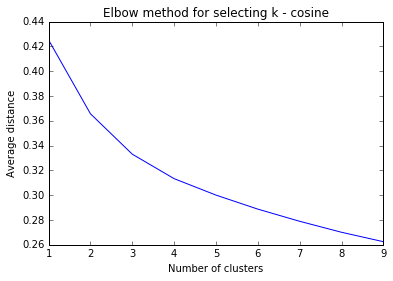

In [419]:
#determine number of k 
from scipy.spatial.distance import cdist 
clusters = range(1,10)
mean_dist = []

for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(data_norm)
    clus_agn = model.predict(data_norm)
    mean_dist.append(sum(np.min(cdist(data_norm, model.cluster_centers_, 'cosine'), axis = 1))/ final_data.shape[0])
    
plt.plot (clusters, mean_dist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Elbow method for selecting k - cosine')

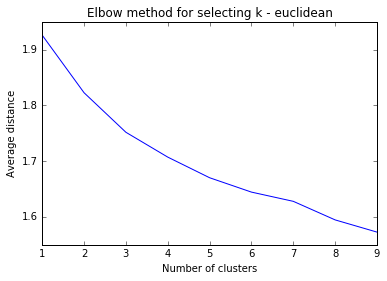

In [420]:
#determine number of k 
from scipy.spatial.distance import cdist 
clusters = range(1,10)
mean_dist = []

for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(data_norm)
    clus_agn = model.predict(data_norm)
    mean_dist.append(sum(np.min(cdist(data_norm, model.cluster_centers_, 'euclidean'), axis = 1))/ final_data.shape[0])
    
plt.plot (clusters, mean_dist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Elbow method for selecting k - euclidean')

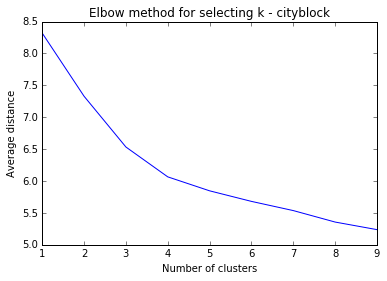

In [493]:
#determine number of k 
from scipy.spatial.distance import cdist 
clusters = range(1,10)
mean_dist = []

for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(data_norm)
    clus_agn = model.predict(data_norm)
    mean_dist.append(sum(np.min(cdist(data_norm, model.cluster_centers_, 'cityblock'), axis = 1))/ final_data.shape[0])
    
plt.plot (clusters, mean_dist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Elbow method for selecting k - cityblock')

The elbow plot does not show an apparent drop in the average distance. Comparing each plot, we can say that the number of clusters for kmeans can be 3. The cityblock distance metric shows a drop at k=3 where the average distance is ~6.5

In [421]:
from sklearn.metrics import pairwise_distances #for cityblock 

In [390]:
#running kmeans on the dataset with cosine similarity - code assignmnet 3 
def dist(d1 , d2):
    d1_norm = np.linalg.norm(d1)
    d2_norm = np.linalg.norm(d2)
    cos_simi = (np.dot(d1,d2))/(d1_norm * d2_norm)
    dist = 1 - cos_simi
    return dist

In [436]:
#function from Machine Learning in Action
from numpy import *

def randCent(dataSet, k):
    n = dataSet.shape[1]
    centroids = np.zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * np.random.rand(k)
    return centroids 

In [437]:
def kMeans(dataSet, k, createCent=randCent):
    m = dataSet.shape[0]
    clusterAssment = np.zeros((m,2))
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = scipy.spatial.distance.cityblock(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        for cent in range(k): 
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] 
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) 
    return centroids, clusterAssment

In [494]:
def kMeans_cosine(dataSet, k, distMeas=dist, createCent=randCent):
    m = dataSet.shape[0]
    clusterAssment = np.zeros((m,2))
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        for cent in range(k): 
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] 
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) 
    return centroids, clusterAssment

In [438]:
center_3, cluster_3 = kMeans(np.array(data_norm), 3)

In [451]:
print(pd.DataFrame(center_3))

         0         1         2         3         4         5         6   \
0  0.660802  0.000000  0.229859  0.127583  0.026904  0.064291  0.271189   
1  0.632877  0.000078  0.211422  0.122028  0.038656  0.086713  0.313442   
2  0.621800  0.000148  0.286615  0.148563  0.038192  0.067532  0.301165   

         7         8         9     ...           41        42        43  \
0  0.078616  0.008585  0.441849    ...     0.033743  0.032794  0.000000   
1  0.069697  0.007265  0.427661    ...     0.004196  0.086946  0.000000   
2  0.086416  0.007358  0.369472    ...     0.050197  0.048704  0.000793   

         44        45        46        47        48        49        50  
0  0.009883  0.000000  0.000000  0.540082  0.314316  0.129729  0.005990  
1  0.099456  0.374631  0.265540  0.163209  0.093512  0.000894  0.002758  
2  0.100007  0.551248  0.347822  0.000000  0.000000  0.000018  0.000111  

[3 rows x 51 columns]


In [453]:
print(pd.DataFrame(cluster_3).head())

     0          1
0  2.0  28.570559
1  0.0  22.897328
2  1.0  30.606493
3  2.0  30.143241
4  0.0  22.897328


In [463]:
data_norm = pd.DataFrame(data_norm)
data_norm.columns = final_data.columns
data_norm.head()

,rating,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,occupation_technician,occupation_writer,age_bins_0-9,age_bins_10-19,age_bins_20-29,age_bins_30-39,age_bins_40-49,age_bins_50-59,age_bins_60-69,age_bins_70-79
0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [475]:
#attach cluster labels to the data frame
md = pd.Series(cluster_3[:,0])
data_norm['cluster_labels'] = md

Cluster1 = pd.DataFrame(data_norm.loc[data_norm['cluster_labels'] == 0])
Cluster2 =  pd.DataFrame(data_norm.loc[data_norm['cluster_labels'] == 1])
Cluster3 =  pd.DataFrame(data_norm.loc[data_norm['cluster_labels'] == 2])
print(Cluster1.shape,Cluster2.shape,Cluster3.shape)

(20034, 52) (25740, 52) (54226, 52)


In [476]:
Cluster1.head(2)

,rating,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,occupation_writer,age_bins_0-9,age_bins_10-19,age_bins_20-29,age_bins_30-39,age_bins_40-49,age_bins_50-59,age_bins_60-69,age_bins_70-79,cluster_labels
1,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


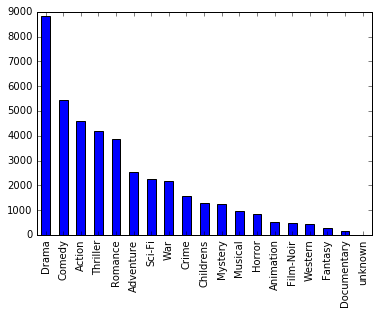

In [489]:
counts = []
genres_1=Cluster1.loc[:,"unknown":"Western"]
count1 = genres_1.sum(axis=0)
count1.sort_values(inplace = True, ascending= False)
count1[:5]
counts.append(count1[:5])
count1.plot('bar')

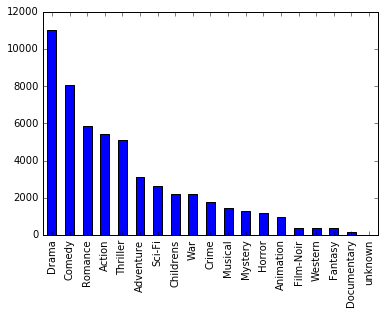

In [490]:
genres_2=Cluster2.loc[:,"unknown":"Western"]
count2 = genres_2.sum(axis=0)
count2.sort_values(inplace = True, ascending= False)
count2[:5]
counts.append(count2[:5])
count2.plot('bar')

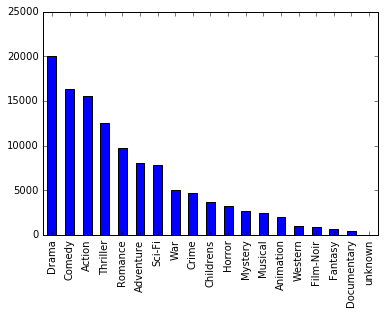

In [491]:
genres_3=Cluster3.loc[:,"unknown":"Western"]
count3 = genres_3.sum(axis=0)
count3.sort_values(inplace = True, ascending= False)
count3[:5]
counts.append(count3[:5])
count3.plot('bar')

In [492]:
for i in range(3):
    print("CLUSTER ", i+1 )
    print (counts[i])
    print ("--"*15)

CLUSTER  1
Drama       8852.0
Comedy      5433.0
Action      4605.0
Thriller    4195.0
Romance     3860.0
dtype: float64
------------------------------
CLUSTER  2
Drama       11008.0
Comedy       8068.0
Romance      5858.0
Action       5442.0
Thriller     5086.0
dtype: float64
------------------------------
CLUSTER  3
Drama       20035.0
Comedy      16331.0
Action      15542.0
Thriller    12591.0
Romance      9743.0
dtype: float64
------------------------------


We can see from the above results, that the clusters are not as distinguished with respect to genre. Therefore, using Euclidean distance as a metric for kmeans with k = 5. Below are the results.

In [521]:
#kmeans cluster results with k = 5
kmeans5 = KMeans(n_clusters=5, max_iter=500) # initialization
kmeans5.fit(final_data)
print("CLUSTER CENTERS:\n",kmeans5.cluster_centers_)
print("CLUSTER LABELS:\n",kmeans5.labels_)

CLUSTER CENTERS:
 [[ 4.418  0.     0.204  0.119  0.041  0.079  0.288  0.072  0.008  0.464
   0.011  0.017  0.039  0.06   0.053  0.247  0.1    0.192  0.099  0.015  1.
   0.     0.122  0.033 -0.     0.111  0.007  0.007  0.01   0.047  0.009
   0.003  0.114  0.017  0.015  0.138  0.017  0.002  0.017  0.004  0.231
   0.003  0.092  0.     0.101  0.355  0.29   0.166  0.086  0.001  0.002]
 [ 3.     0.     0.267  0.144  0.038  0.082  0.322  0.074  0.006  0.364
   0.017  0.014  0.056  0.052  0.048  0.186  0.121  0.224  0.074  0.02
   0.25   0.75   0.073  0.02   0.005  0.087  0.092  0.022  0.028  0.03
   0.003  0.011  0.056  0.022  0.008  0.113  0.073  0.018  0.008  0.022
   0.217  0.037  0.055  0.     0.081  0.393  0.259  0.152  0.089  0.026
   0.002]
 [ 4.359  0.     0.286  0.144  0.039  0.054  0.276  0.103  0.008  0.41
   0.009  0.018  0.056  0.042  0.052  0.19   0.154  0.239  0.104  0.019 -0.
   1.     0.03   0.017  0.011  0.013  0.094  0.022  0.02   0.002  0.001
   0.017  0.012  0.008  0.014 

In [560]:
md = pd.Series(kmeans.labels_)
final_data['cluster_labels'] = md

Cluster1 = pd.DataFrame(final_data.loc[final_data['cluster_labels'] == 0])
Cluster2 =  pd.DataFrame(final_data.loc[final_data['cluster_labels'] == 1])
Cluster3 =  pd.DataFrame(final_data.loc[final_data['cluster_labels'] == 2])
Cluster4 =  pd.DataFrame(final_data.loc[final_data['cluster_labels'] == 3])
Cluster5 =  pd.DataFrame(final_data.loc[final_data['cluster_labels'] == 4])
print(Cluster1.shape,Cluster2.shape,Cluster3.shape, Cluster4.shape, Cluster5.shape)

(12439, 52) (20120, 52) (17923, 52) (32038, 52) (17480, 52)


In [561]:
#print genres in each cluster
counts = []

genres_1=Cluster1.loc[:,"unknown":"Western"]
count1 = genres_1.sum(axis=0)
count1.sort_values(inplace = True, ascending= False)
counts.append(count1[:5])

genres_2=Cluster2.loc[:,"unknown":"Western"]
count2 = genres_2.sum(axis=0)
count2.sort_values(inplace = True, ascending= False)
counts.append(count2[:5])


genres_3=Cluster3.loc[:,"unknown":"Western"]
count3 = genres_3.sum(axis=0)
count3.sort_values(inplace = True, ascending= False)
counts.append(count3[:5])

genres_4=Cluster4.loc[:,"unknown":"Western"]
count4 = genres_4.sum(axis=0)
count4.sort_values(inplace = True, ascending= False)
counts.append(count4[:5])

genres_5=Cluster5.loc[:,"unknown":"Western"]
count5 = genres_5.sum(axis=0)
count5.sort_values(inplace = True, ascending= False)
counts.append(count5[:5])

for i in range(5):
    print("CLUSTER ", i+1 )
    print (counts[i])
    print ("--"*15)


CLUSTER  1
Action       12116
Adventure     7309
Sci-Fi        6033
Thriller      5127
Romance       2425
dtype: int64
------------------------------
CLUSTER  2
Drama       9357
Comedy      6364
Romance     4663
Thriller    3838
Action      3438
dtype: int64
------------------------------
CLUSTER  3
Drama       7098
Comedy      6373
Thriller    3845
Romance     3489
Action      3345
dtype: int64
------------------------------
CLUSTER  4
Drama       17354
Comedy       9913
Romance      5925
Thriller     5203
Crime        3307
dtype: int64
------------------------------
CLUSTER  5
Comedy      6135
Drama       5413
Action      4801
Thriller    3859
Romance     2959
dtype: int64
------------------------------


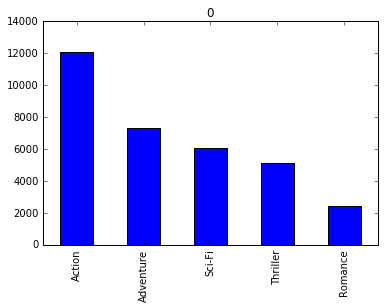

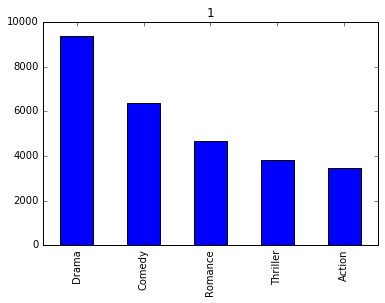

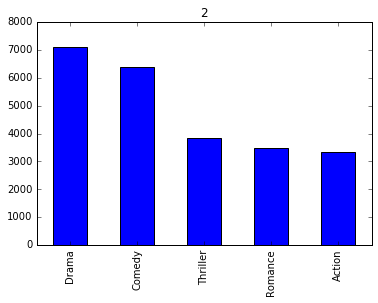

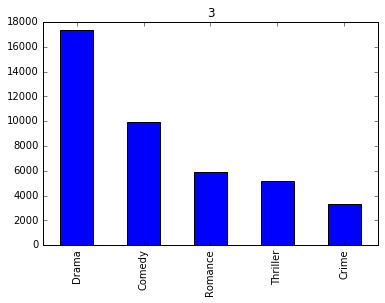

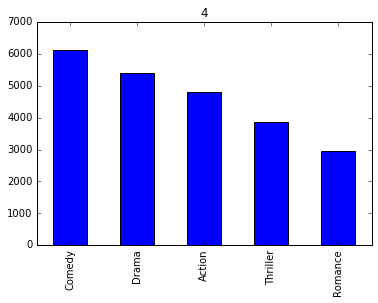

In [578]:
for i in range(5):
    plt.figure()
    counts[i].plot(kind = 'bar')
    plt.title(i)

In [887]:
cnt_occs =[]
occ_1=Cluster1.loc[:,"occupation_administrator":"occupation_writer"]
cnt_occ_1 = occ_1.sum(axis=0)
cnt_occ_1.sort_values(inplace = True, ascending= False)
cnt_occs.append(cnt_occ_1[:5])
print("Top 5 Occupations in Cluster 0:\n", cnt_occ_1[:5])
print("--"*20)

occ_2=Cluster2.loc[:,"occupation_administrator":"occupation_writer"]
cnt_occ_2 = occ_2.sum(axis=0)
cnt_occ_2.sort_values(inplace = True, ascending= False)
cnt_occs.append(cnt_occ_2[:5])
print("Top 5 Occupations in Cluster 1:\n", cnt_occ_2[:5])
print("--"*20)

occ_3=Cluster3.loc[:,"occupation_administrator":"occupation_writer"]
cnt_occ_3 = occ_3.sum(axis=0)
cnt_occ_3.sort_values(inplace = True, ascending= False)
cnt_occs.append(cnt_occ_3[:5])
print("Top 5 Occupations in Cluster 2:\n", cnt_occ_3[:5])
print("--"*20)

occ_4=Cluster4.loc[:,"occupation_administrator":"occupation_writer"]
cnt_occ_4 = occ_4.sum(axis=0)
cnt_occ_4.sort_values(inplace = True, ascending= False)
cnt_occs.append(cnt_occ_4[:5])
print("Top 5 Occupations in Cluster 3:\n", cnt_occ_4[:5])
print("--"*20)

occ_5=Cluster4.loc[:,"occupation_administrator":"occupation_writer"]
cnt_occ_5 = occ_5.sum(axis=0)
cnt_occ_5.sort_values(inplace = True, ascending= False)
cnt_occs.append(cnt_occ_5[:5])
print("Top 5 Occupations in Cluster 4:\n", cnt_occ_5[:5])
print("--"*20)

Top 5 Occupations in Cluster 0:
 occupation_student       3346.0
occupation_programmer    1357.0
occupation_engineer      1314.0
occupation_other         1204.0
occupation_educator       873.0
dtype: float64
----------------------------------------
Top 5 Occupations in Cluster 1:
 occupation_student          4415.0
occupation_other            2894.0
occupation_librarian        2376.0
occupation_administrator    2197.0
occupation_educator         2162.0
dtype: float64
----------------------------------------
Top 5 Occupations in Cluster 2:
 occupation_student       3769.0
occupation_engineer      2136.0
occupation_other         1792.0
occupation_programmer    1656.0
occupation_educator      1554.0
dtype: float64
----------------------------------------
Top 5 Occupations in Cluster 3:
 occupation_student       6442.0
occupation_educator      3590.0
occupation_engineer      3321.0
occupation_programmer    3178.0
occupation_other         2990.0
dtype: float64
------------------------------

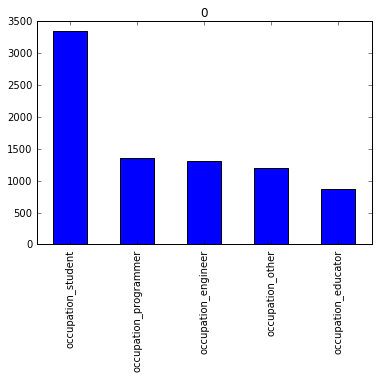

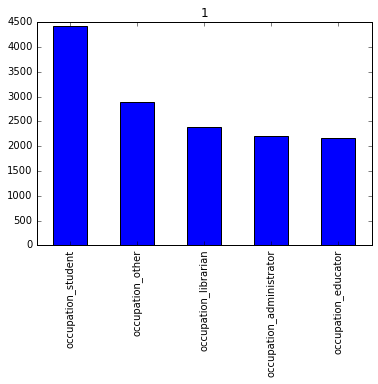

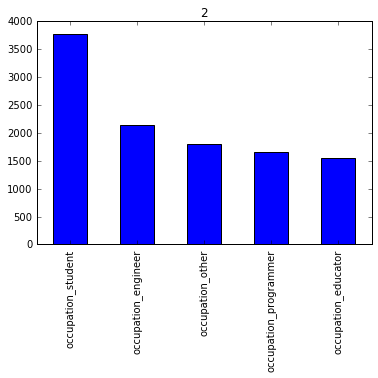

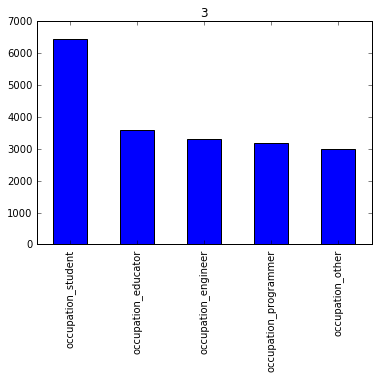

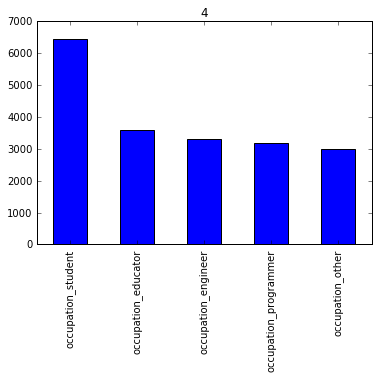

In [889]:
for i in range(5):
    plt.figure()
    cnt_occs[i].plot('bar')
    plt.title(i)
    plt.show()


In [618]:
bins = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
merged_data['age_bins'] = pd.cut(merged_data.age, range(0, 81, 10), right=False, labels=bins)
merged_data.head()

,user_id,age,gender,occupation,movie_id,rating,unknown,Action,Adventure,Animation,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age_bins
0,1,24,M,technician,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20-29
1,13,47,M,educator,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40-49
2,18,35,F,other,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30-39
3,58,27,M,programmer,61,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20-29
4,59,49,M,educator,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40-49


In [619]:
#get age and movie information
md = pd.Series(kmeans.labels_)
merged_data['cluster_labels'] = md

cluster1 = pd.DataFrame(merged_data.loc[merged_data['cluster_labels'] == 0])
cluster2 =  pd.DataFrame(merged_data.loc[merged_data['cluster_labels'] == 1])
cluster3 =  pd.DataFrame(merged_data.loc[merged_data['cluster_labels'] == 2])
cluster4 =  pd.DataFrame(merged_data.loc[merged_data['cluster_labels'] == 3])
cluster5 =  pd.DataFrame(merged_data.loc[merged_data['cluster_labels'] == 4])
print(cluster1.shape,cluster2.shape,cluster3.shape, cluster4.shape, cluster5.shape)

(12439, 27) (20120, 27) (17923, 27) (32038, 27) (17480, 27)


In [620]:
merged_data.head()

,user_id,age,gender,occupation,movie_id,rating,unknown,Action,Adventure,Animation,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age_bins,cluster_labels
0,1,24,M,technician,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,20-29,3
1,13,47,M,educator,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,40-49,3
2,18,35,F,other,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,30-39,1
3,58,27,M,programmer,61,5,0,0,0,0,...,0,0,0,0,0,0,0,0,20-29,3
4,59,49,M,educator,61,4,0,0,0,0,...,0,0,0,0,0,0,0,0,40-49,3


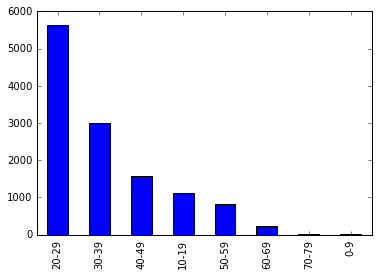

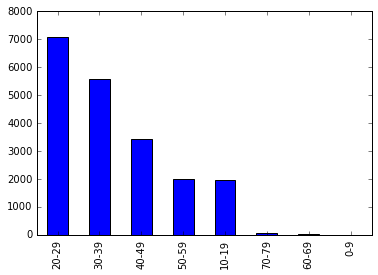

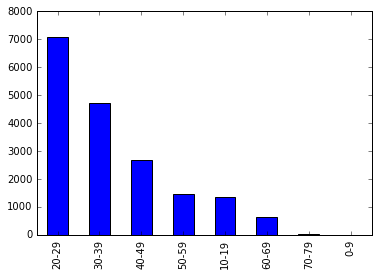

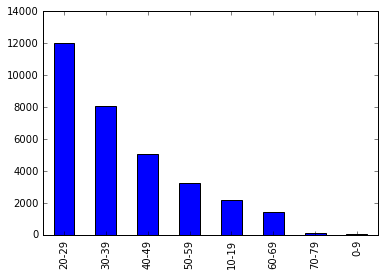

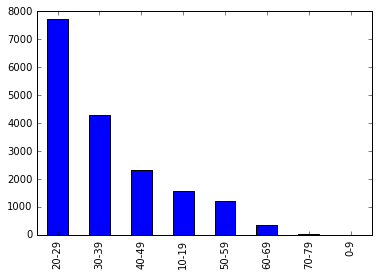

In [621]:
cluster1["age_bins"].value_counts().plot(kind='bar')
plt.figure()
cluster2["age_bins"].value_counts().plot(kind='bar')
plt.figure()
cluster3["age_bins"].value_counts().plot(kind='bar')
plt.figure()
cluster4["age_bins"].value_counts().plot(kind='bar')
plt.figure()
cluster5["age_bins"].value_counts().plot(kind='bar')

In [897]:
#average rating in each cluster
from statistics import mode
print("Rating - Mode value")

print("Cluster 0: ", mode(cluster1["rating"].mode()))
print("Cluster 1: ", mode(cluster2["rating"].mode()))
print("Cluster 2: ", mode(cluster3["rating"].mode()))
print("Cluster 3: ", mode(cluster4["rating"].mode()))
print("Cluster 4: ", mode(cluster5["rating"].mode()))

Rating - Mode value
Cluster 0:  4
Cluster 1:  4
Cluster 2:  3
Cluster 3:  4
Cluster 4:  2


In [898]:
cluster1.head()

,user_id,age,gender,occupation,movie_id,rating,unknown,Action,Adventure,Animation,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age_bins,cluster_labels
125,1,24,M,technician,33,4,0,1,0,0,...,0,0,0,1,0,1,0,0,20-29,0
126,10,53,M,lawyer,33,4,0,1,0,0,...,0,0,0,1,0,1,0,0,50-59,0
127,13,47,M,educator,33,5,0,1,0,0,...,0,0,0,1,0,1,0,0,40-49,0
132,90,60,M,educator,33,4,0,1,0,0,...,0,0,0,1,0,1,0,0,60-69,0
135,110,19,M,student,33,4,0,1,0,0,...,0,0,0,1,0,1,0,0,10-19,0


* Cluster 0 – Students, programmers and engineers that like movies from the genres action, adventure and scifi with average rating of 4. 
* Cluster 1 – Students and librarians that like movies from the genres drama, comedy and romance with average rating of 4. 
* Cluster 2 – Students and engineers that like movies from the genres drama, comedy and thriller with average rating of 3. 
* Cluster 3 – Students, educators and engineers that like movies from the genres drama, comedy and romance with average rating of 4. 
* Cluster 4 – Students, educators and engineers that like movies from the genres drama, comedy and action with average rating of 2. 


Hierarchical clustering

In [281]:
from matplotlib import pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [282]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

In [283]:
#Reference: http://www.dummies.com/programming/big-data/data-science/data-science-performing-hierarchical-clustering-with-python/
Hclustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
Hclustering.fit(test)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete',
            memory=Memory(cachedir=None), n_clusters=5, n_components=None,
            pooling_func=<function mean at 0x000001AF201488C8>)

[]

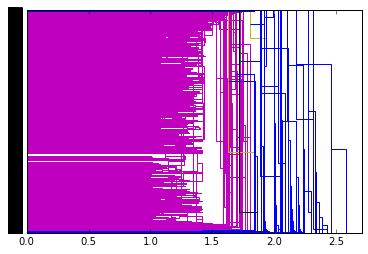

In [304]:
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Z1 = scipy.cluster.hierarchy.dendrogram(Y, orientation='right')
ax1.set_xticks([])
ax1.set_yticks([])